In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.constants import hbar

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right |}$$

## Density Matrices and Optical Bloch Equations

## Problem 1:

Given the hamiltonian

$$\dot{\rho} = -\frac{i}{\hbar}[H,\rho] + \sum_{i}\gamma_i\left[L_i\rho L^{\dagger}_i - \frac{1}{2}\left(L^{\dagger}_iL_i\rho + \rho L^{\dagger}_iL_i\right)\right]$$

#### a) What is the correct jump operator $L$ needed to represent spontaneous decay?

The correct operator needed for spontaneous decay is the projection operator from the excited state to the ground state.  This would be equivalent to a jump from one energy level to another, or $\sigma_-$.

We can see that this works:

$$\sigma_- \ket{1} = \begin{pmatrix}
0 & 0 \\
1 & 0 \\
\end{pmatrix}\begin{pmatrix}1 \\ 0 \end{pmatrix} = \begin{pmatrix}0 \\ 1 \end{pmatrix} = \ket{0}$$

Thus this is the appropriate operator, as it transitions the excited state into the ground state


#### b) Write down the spontaneous decay part of the master equation in matrix form.  Explain why this makes sense:

$$\rho = \begin{pmatrix}
\rho_{ee} & \rho_{eg} \\
\rho_{ge} & \rho_{gg}\\\end{pmatrix}$$

and the spontaneous decay part of the master equation:
$$\gamma\left[\hat{\sigma}_-\rho \hat{\sigma}_-^{\dagger} - \frac{1}{2}\hat{\sigma}_-^{\dagger}\hat{\sigma}_-\rho + \rho \hat{\sigma}_-^{\dagger}\hat{\sigma}_-\right]$$

Therefore combining the two and using the lowering operator for a two-level system:

$$\sigma_- = \begin{pmatrix}
0 & 0 \\
1 & 0\\\end{pmatrix}$$

$$\sigma_-^\dagger = \sigma_+ = \begin{pmatrix}
0 & 1 \\
0 & 0\\\end{pmatrix}$$

$$\gamma\left[\hat{\sigma}_-\rho \hat{\sigma}_-^{\dagger} - \frac{1}{2}\hat{\sigma}_-^{\dagger}\hat{\sigma}_-\rho + \rho \hat{\sigma}_-^{\dagger}\hat{\sigma}_-\right] =$$

$$\gamma\left[\begin{pmatrix}
0 & 0 \\
1 & 0\\\end{pmatrix}
\begin{pmatrix}
\rho_{ee} & \rho_{eg} \\
\rho_{ge} & \rho_{gg}\\\end{pmatrix}
\begin{pmatrix}
0 & 1 \\
0 & 0\\\end{pmatrix} - \frac{1}{2}
\begin{pmatrix}
0 & 1 \\
0 & 0\\\end{pmatrix}
\begin{pmatrix}
0 & 0 \\
1 & 0\\\end{pmatrix}
\begin{pmatrix}
\rho_{ee} & \rho_{eg} \\
\rho_{ge} & \rho_{gg}\\\end{pmatrix} - \frac{1}{2}
\begin{pmatrix}
\rho_{ee} & \rho_{eg} \\
\rho_{ge} & \rho_{gg}\\\end{pmatrix}
\begin{pmatrix}
0 & 1 \\
0 & 0\\\end{pmatrix}
\begin{pmatrix}
0 & 0 \\
1 & 0\\\end{pmatrix}\right]$$

$$= \gamma\left[\begin{pmatrix}
0 & 0 \\
0 & \rho_{ee}\\\end{pmatrix} - \frac{1}{2}
\begin{pmatrix}
\rho_{ee} & \rho_{eg} \\
0 & 0\\\end{pmatrix} - \frac{1}{2}
\begin{pmatrix}
\rho_{ee} & 0 \\
\rho_{ge} & 0\\\end{pmatrix}\right]$$

thus, we get the spontaneous decay part of the equation in matrix form:

$$= \gamma\left[\begin{pmatrix}
-\rho_{ee} & -\frac{\rho_{eg}}{2} \\
-\frac{\rho_{ge}}{2} & \rho_{ee}\\\end{pmatrix}\right]$$

This makes sense because we see that the diagonal elements which represent the population show only the population for $rho_{ee}$, if the equations of motion were to be solved we see that the population of the excited state decreases exponentially, and the population of the ground state increases exponentially.  The coherences represent the average value of the transition between excited and ground state (which is $\gamma$ multiplied by the density matrix elements), which is represented by the off-diagonal elements.

#### c) Derive the equations of motion for the density matrix components $\rho_{ij}$  Make a transformation to get rid of the time dependence.  Write your solutions in terms of $\delta = \omega-\omega_0$, $\gamma$, $s_0 = 2|\Omega|^2/\gamma^2$

We have the two-level system hamiltonian:

$$H = \frac{\hbar}{2}\begin{pmatrix}
2\omega_0 & \Omega e^{-i\omega t} \\ 
\Omega^*e^{i\omega t} & 0 \end{pmatrix}$$

Thus we get:

$$\frac{d}{dt}\rho = \frac{i}{\hbar}\left(\rho H - H\rho\right) + \gamma H'$$

so,

$$\frac{d}{dt}\rho_{gg} = \frac{i}{\hbar}\bra{g}\left(\rho H - H)\rho\right)+ \gamma H'\ket{g}$$
 
$$= \frac{i}{\hbar}\left[\bra{g}\rho H \ket{g} - \bra{g}H\rho \ket{g}\right] + \gamma \bra{g}H'\ket{g}$$

$$= \frac{i}{\hbar}\left[\bra{g}\rho \ket{g}\bra{g} H \ket{g} +\bra{g}\rho \ket{e}\bra{e} H \ket{g}  - \bra{g}H\ket{g}\bra{g}\rho \ket{g} - \bra{g}H\ket{e}\bra{e}\rho \ket{g} \right] + \gamma \bra{g}H'\ket{g}$$

$$= \frac{i}{\hbar}\left[\bra{g}\rho \ket{e}\bra{e} H \ket{g}- \bra{g}H\ket{e}\bra{e}\rho \ket{g} \right] + \gamma \bra{g}H'\ket{g}$$

$$= \frac{i}{\hbar}\left[\rho_{ge}\begin{pmatrix}
1 & 0 \end{pmatrix} \frac{\hbar}{2}\begin{pmatrix}
2\omega_0 & \Omega e^{-i\omega t} \\ 
\Omega^*e^{i\omega t} & 0 \end{pmatrix}
\begin{pmatrix}
0 \\ 1 \end{pmatrix} - \rho_{eg}\begin{pmatrix}
0 & 1 \end{pmatrix} \frac{\hbar}{2}\begin{pmatrix}
2\omega_0 & \Omega e^{-i\omega t} \\ 
\Omega^*e^{i\omega t} & 0 \end{pmatrix}
\begin{pmatrix}
1 \\ 0 \end{pmatrix}\right] + \gamma \begin{pmatrix}
0 & 1 \end{pmatrix} \begin{pmatrix}
-\rho_{ee} & -\frac{\rho_{eg}}{2} \\
-\frac{\rho_{ge}}{2} & \rho_{ee}\end{pmatrix}\begin{pmatrix}
0 \\ 1 \end{pmatrix}$$

$$\boxed{\frac{d}{dt}\rho_{gg} = \frac{i}{2}\left[\Omega e^{-i\omega t}\rho_{ge} - \Omega^* e^{i\omega t}\rho_{eg}\right] + \gamma\rho_{ee}}$$

Similarly if we follow the same process for $\rho_{ee}$, we get

$$\frac{d}{dt}\rho_{gg} = \frac{i}{\hbar}\left[\bra{e}\rho \ket{g}\bra{g} H \ket{e} +\bra{e}\rho \ket{e}\bra{e} H \ket{e}  - \bra{e}H\ket{g}\bra{g}\rho \ket{e} - \bra{e}H\ket{e}\bra{e}\rho \ket{e} \right] + \gamma \bra{e}H'\ket{e}$$

$$\boxed{\frac{d}{dt}\rho_{ee} = \frac{i}{2}\left[\Omega^* e^{i\omega t}\rho_{eg} - \Omega e^{-i\omega t}\rho_{ge}\right] - \gamma\rho_{ee}}$$


for $\rho_{eg}$ we get,

$$\frac{d}{dt}\rho_{eg} = \frac{i}{\hbar}\left[\bra{e}\rho \ket{g}\bra{g} H \ket{g} +\bra{e}\rho \ket{e}\bra{e} H \ket{g}  - \bra{e}H\ket{g}\bra{g}\rho \ket{g} - \bra{e}H\ket{e}\bra{e}\rho \ket{g} \right] + \gamma \bra{e}H'\ket{g}$$

$$= \frac{i}{\hbar}\left[\rho_{eg}\bra{g} H \ket{g} +\rho_{ee}\bra{e} H \ket{g}  - \bra{e}H\ket{g}\rho_{gg} - \bra{e}H\ket{e}\rho_{eg} \right] + \gamma \bra{e}H'\ket{g}$$

we have,

$$\bra{g} H \ket{g} = \begin{pmatrix}
0 & 1 \end{pmatrix} \frac{\hbar}{2}\begin{pmatrix}
2\omega_0 & \Omega e^{-i\omega t} \\ 
\Omega^*e^{i\omega t} & 0 \end{pmatrix}
\begin{pmatrix}
0 \\ 1 \end{pmatrix} = 0$$

$$\bra{e}H\ket{g} = \begin{pmatrix}
1 & 0 \end{pmatrix} \frac{\hbar}{2}\begin{pmatrix}
2\omega_0 & \Omega e^{-i\omega t} \\ 
\Omega^*e^{i\omega t} & 0 \end{pmatrix}
\begin{pmatrix}
0 \\ 1 \end{pmatrix} = \frac{\hbar}{2}\Omega e^{-i\omega t}$$

$$\bra{g}H\ket{e} = \begin{pmatrix}
0 & 1 \end{pmatrix} \frac{\hbar}{2}\begin{pmatrix}
2\omega_0 & \Omega e^{-i\omega t} \\ 
\Omega^*e^{i\omega t} & 0 \end{pmatrix}
\begin{pmatrix}
1 \\ 0 \end{pmatrix} = \frac{\hbar}{2}\Omega^* e^{i\omega t}$$

$$\bra{e}H\ket{e} = \begin{pmatrix}
1 & 0 \end{pmatrix} \frac{\hbar}{2}\begin{pmatrix}
2\omega_0 & \Omega e^{-i\omega t} \\ 
\Omega^*e^{i\omega t} & 0 \end{pmatrix}
\begin{pmatrix}
1 \\ 0 \end{pmatrix} = \frac{\hbar}{2}2\omega_0$$

$$\bra{e}H'\ket{g} = \begin{pmatrix}
1 & 0 \end{pmatrix} \begin{pmatrix}
-\rho_{ee} & -\frac{\rho_{eg}}{2} \\
-\frac{\rho_{ge}}{2} & \rho_{ee}\end{pmatrix}\begin{pmatrix}
0 \\ 1 \end{pmatrix} = -\frac{\rho_{eg}}{2}$$

$$\bra{g}H'\ket{e} = \begin{pmatrix}
0 & 1 \end{pmatrix} \begin{pmatrix}
-\rho_{ee} & -\frac{\rho_{eg}}{2} \\
-\frac{\rho_{ge}}{2} & \rho_{ee}\end{pmatrix}\begin{pmatrix}
1 \\ 0 \end{pmatrix} = -\frac{\rho_{ge}}{2}$$

we then get the EQ for $\rho_{eg}$:

$$= \frac{i}{\hbar}\left[\rho_{ee}\frac{\hbar}{2}\Omega e^{-i\omega t} - \rho_{gg}\frac{\hbar}{2}\Omega e^{-i\omega t} - \hbar\omega_o \rho_{eg}\right] - \gamma \frac{\rho_{eg}}{2}$$


$$\boxed{\frac{d}{dt}\rho_{eg} = \frac{i}{2}\Omega e^{-i\omega t}\left(\rho_{ee} - \rho_{gg}\right) - \rho_{eg}\left(\frac{\gamma}{2}-i\omega_0\right)}$$

for $\rho_{ge}$,

$$\frac{d}{dt}\rho_{ge} = \frac{i}{\hbar}\left[\bra{g}\rho \ket{g}\bra{g} H \ket{e} +\bra{g}\rho \ket{e}\bra{e} H \ket{e}  - \bra{g}H\ket{g}\bra{g}\rho \ket{e} - \bra{g}H\ket{e}\bra{e}\rho \ket{e} \right] + \gamma \bra{g}H'\ket{e}$$

$$= \frac{i}{\hbar}\left[-\rho_{gg}\frac{\hbar}{2}\Omega^* e^{i\omega t} + \rho_{gg}\frac{\hbar}{2}\Omega^* e^{i\omega t} + \hbar\omega_o \rho_{ge}\right] - \gamma \frac{\rho_{ge}}{2}$$


$$\boxed{\frac{d}{dt}\rho_{ge} = \frac{i}{2}\Omega^* e^{i\omega t}\left(\rho_{ee} - \rho_{gg}\right) - \rho_{ge}\left(\frac{\gamma}{2}+i\omega_0\right)}$$


We must now make a transformation to get rid of the explicit time dependence:

$$\rho_{ge}' = \rho_{ge}e^{i\delta t}$$
$$\rho_{ge}' = \rho_{eg}e^{-i\delta t}$$

We then get the final OB equations:

$$\boxed{\frac{d}{dt}\rho_{gg} = \frac{i}{2}\left[\Omega \rho_{ge}' - \Omega^* \rho_{eg}'\right] + \gamma\rho_{ee}}$$

$$\boxed{\frac{d}{dt}\rho_{ee} = \frac{i}{2}\left[\Omega^* \rho_{eg}' - \Omega \rho_{ge}'\right] - \gamma\rho_{ee}}$$

$$\boxed{\frac{d}{dt}\rho_{eg}' = \frac{i}{2}\Omega \left(\rho_{gg} - \rho_{ee}\right) - \rho_{eg}'\left(\frac{\gamma}{2}-i\delta\right)}$$

$$\boxed{\frac{d}{dt}\rho_{ge}' = -\frac{i}{2}\Omega^* \left(\rho_{ee} - \rho_{gg}\right) - \rho_{ge}'\left(\frac{\gamma}{2}+i\delta\right)}$$





#### d) Find the rate R at which photons from the applied field are scatterred by the atom

This is given by:

$$R = \gamma \rho_{ee}$$

We are tasked with finding $R$ for the steady-state solution to the OBE's, which can be done by setting the time-derivatives equal to zero and solving:

$$0 = \frac{i}{2}\left[\Omega \rho_{ge}' - \Omega^* \rho_{eg}'\right] + \gamma\rho_{ee}$$

$$0 = \frac{i}{2}\left[\Omega^* \rho_{eg}' - \Omega \rho_{ge}'\right] - \gamma\rho_{ee}$$

$$0 = \frac{i}{2}\Omega \left(\rho_{gg} - \rho_{ee}\right) - \rho_{eg}'\left(\frac{\gamma}{2}-i\delta\right)$$

$$0 = \frac{i}{2}\Omega^* \left(\rho_{ee} - \rho_{gg}\right) - \rho_{ge}'\left(\frac{\gamma}{2}+i\delta\right)$$

We then set up the system of linear EQ:

$$\begin{pmatrix}
\gamma & 0 & -\frac{i}{2}\Omega^* & \frac{i}{2}\Omega \\
-\gamma & 0 & \frac{i}{2}\Omega^* & -\frac{i}{2}\Omega \\
-\frac{i}{2}\Omega & \frac{i}{2}\Omega & -\left(\frac{\gamma}{2}-i\delta\right) & 0 \\
\frac{i}{2}\Omega^* & -\frac{i}{2}\Omega^* & 0 & -\left(\frac{\gamma}{2}+i\delta\right) \end{pmatrix}
\begin{pmatrix}
\rho_{ee} \\
\rho_{gg} \\
\rho_{eg}' \\
\rho_{ge} \\
\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

We then get the solution for $\rho_{ee}$:

$$\rho_{ee} = \frac{|\Omega|^2}{2\gamma}\frac{1}{1+\frac{\delta^2}{\gamma^2}+\frac{\Omega^2}{\gamma^2}}$$

taking the substitution $s_o = \frac{2|\Omega|^2}{\gamma^2}$ we get:

$$\rho_{ee} = \frac{1}{4}s_o\frac{1}{1+\frac{\delta^2}{\gamma^2}+\frac{1}{2}s_o}$$

$$= \frac{s_o}{4+\frac{4\delta^2}{\gamma^2}+2s_o}$$

Therefore we get the scattering rate:

$$R = \frac{\gamma s_o}{4+\frac{4\delta^2}{\gamma^2}+2s_o}$$

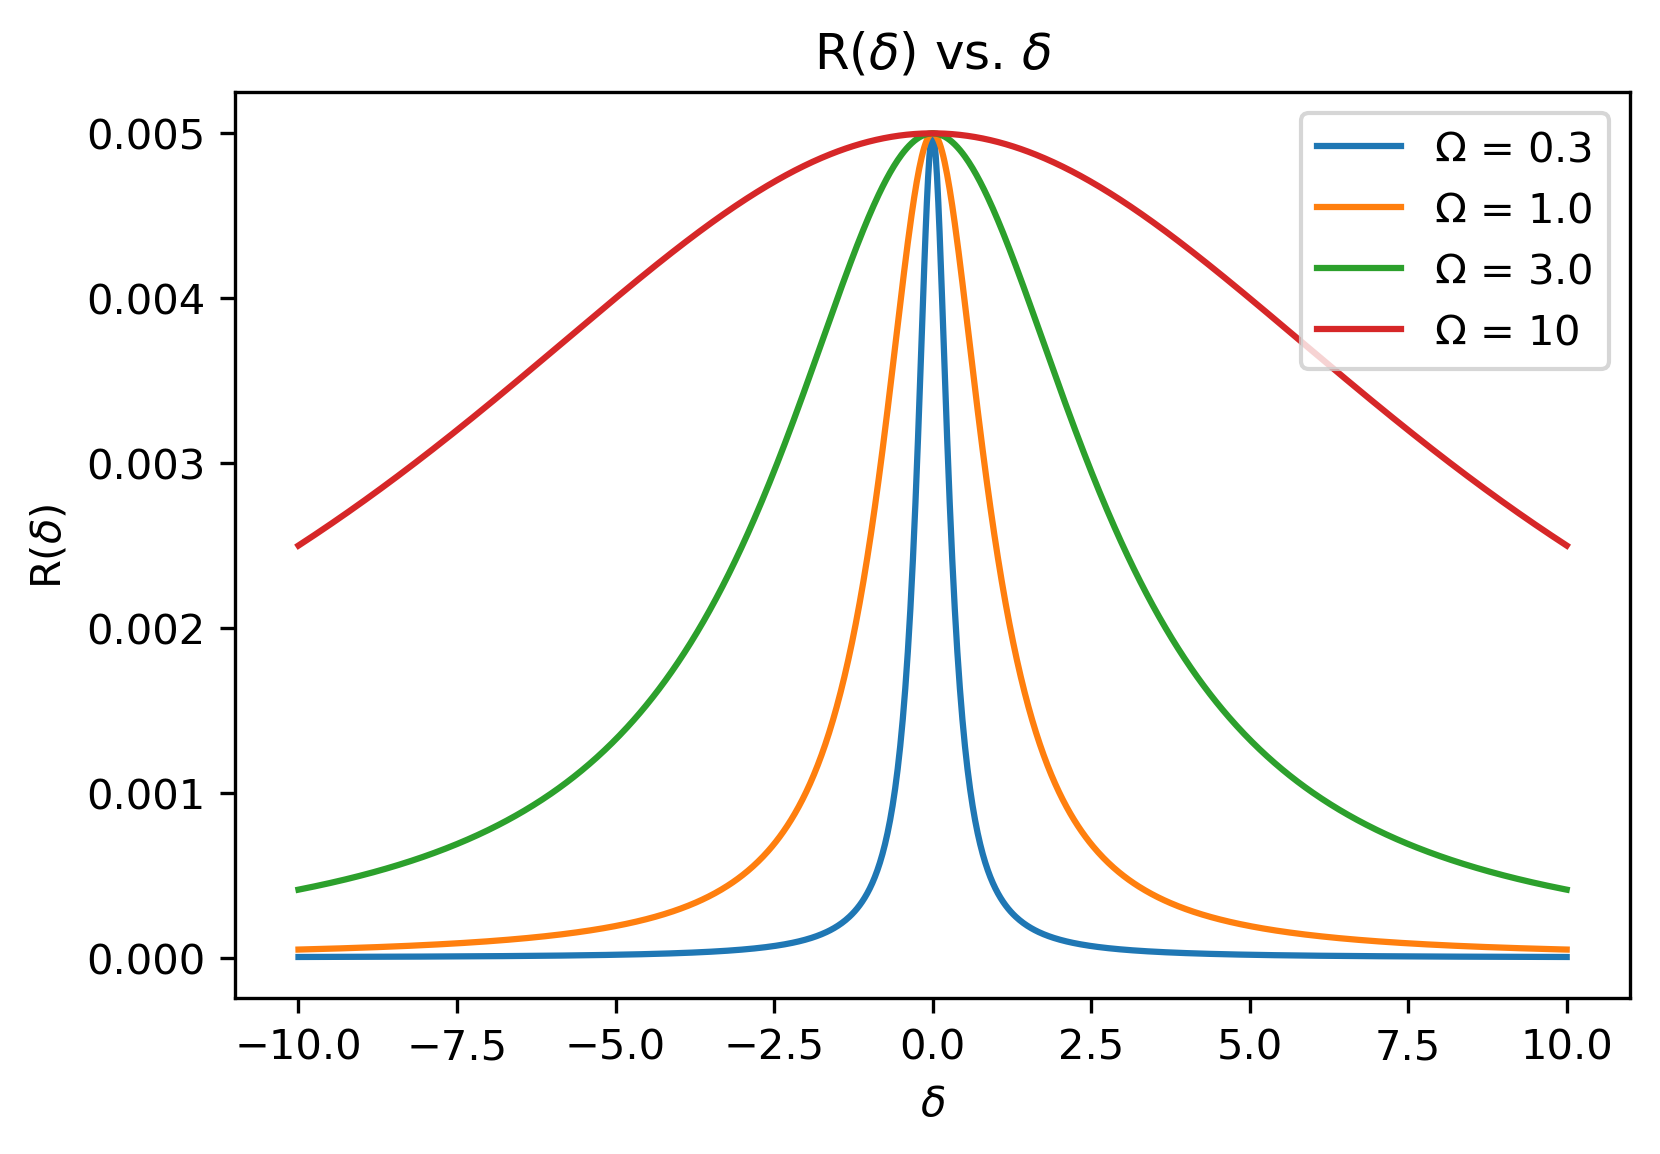

In [2]:
## Part E

# Define scattering rate as a function of delta
def R(x,Omega):
    So = 2*Omega**2/gamma**2
    return gamma*So/(4+4*x**2/gamma**2 + 2*So)

# Define Constants
Omega = [0.3,1.0,3.0,10]
delta = np.linspace(-10,10,1000)
gamma = 1e-2

#Plot
plt.figure(dpi=300)
plt.ylabel("R($\delta$)")
plt.xlabel("$\delta$")
plt.title("R($\delta$) vs. $\delta$")
for i in Omega:
    plt.plot(delta,R(delta,i), label = "$\Omega$ = "+str(i))
plt.legend()
plt.show()

We can see that all of the different tuning of the lasers converges to a maxmimum scattering rate of 0.005 (for our gamme = 1) when the lasers are on resonance.  We can see that as the de-tuning moves closer to the resonance, the curve begins to flatten off, meaning that the state is full populated and henceforth saturated.  The broader the curves, the more powerful the laser and hence power broadening.  In this case we see that it is possible to achieve saturation with greater detuning if the laser is more powerful.

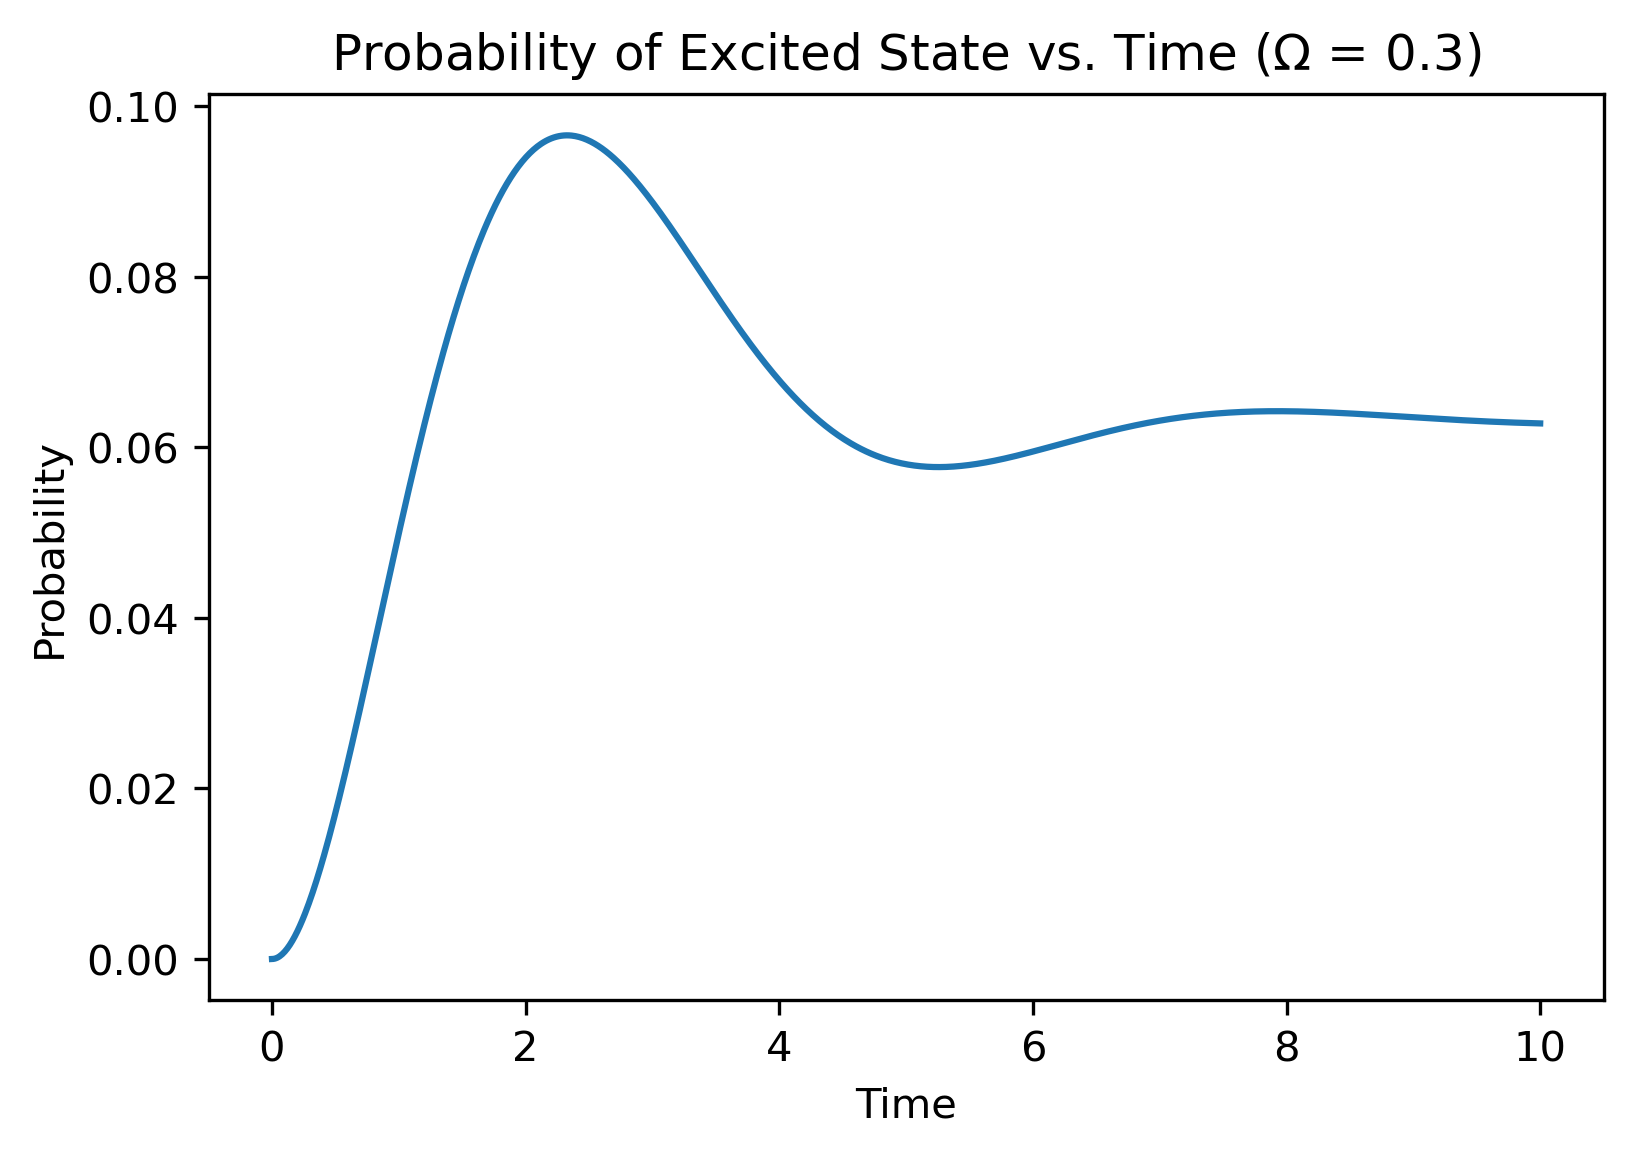

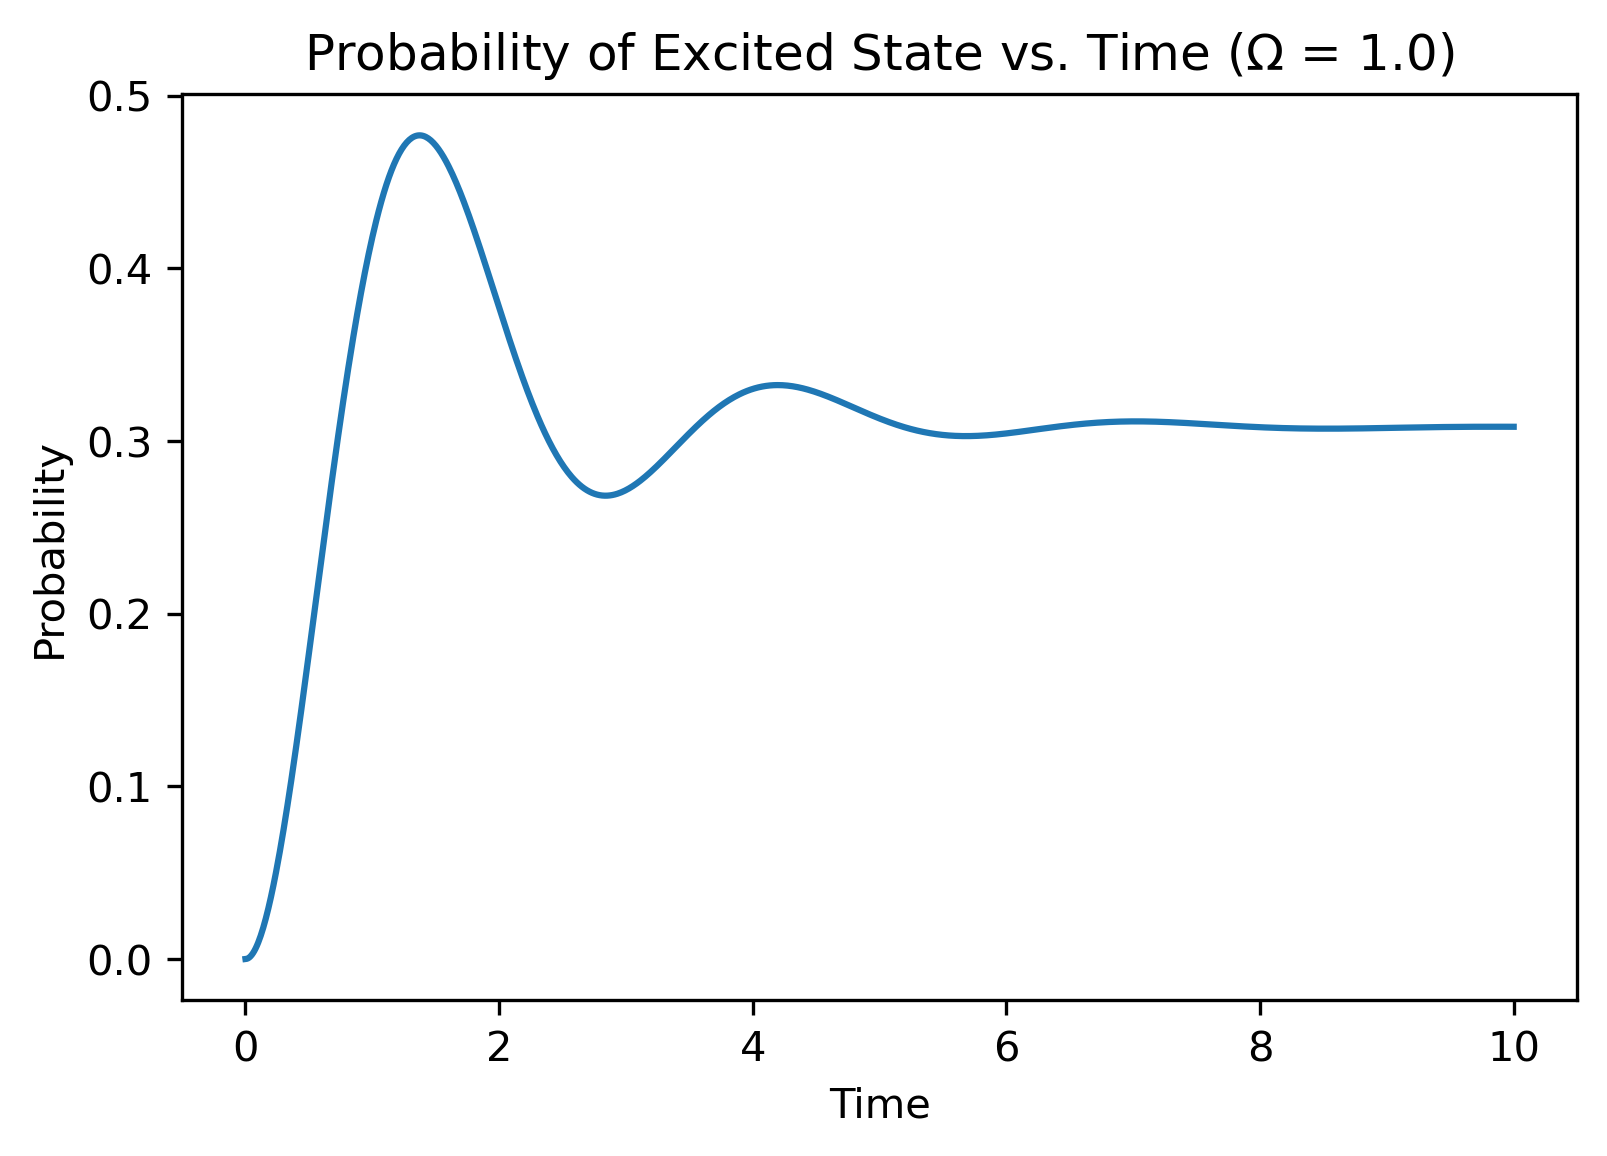

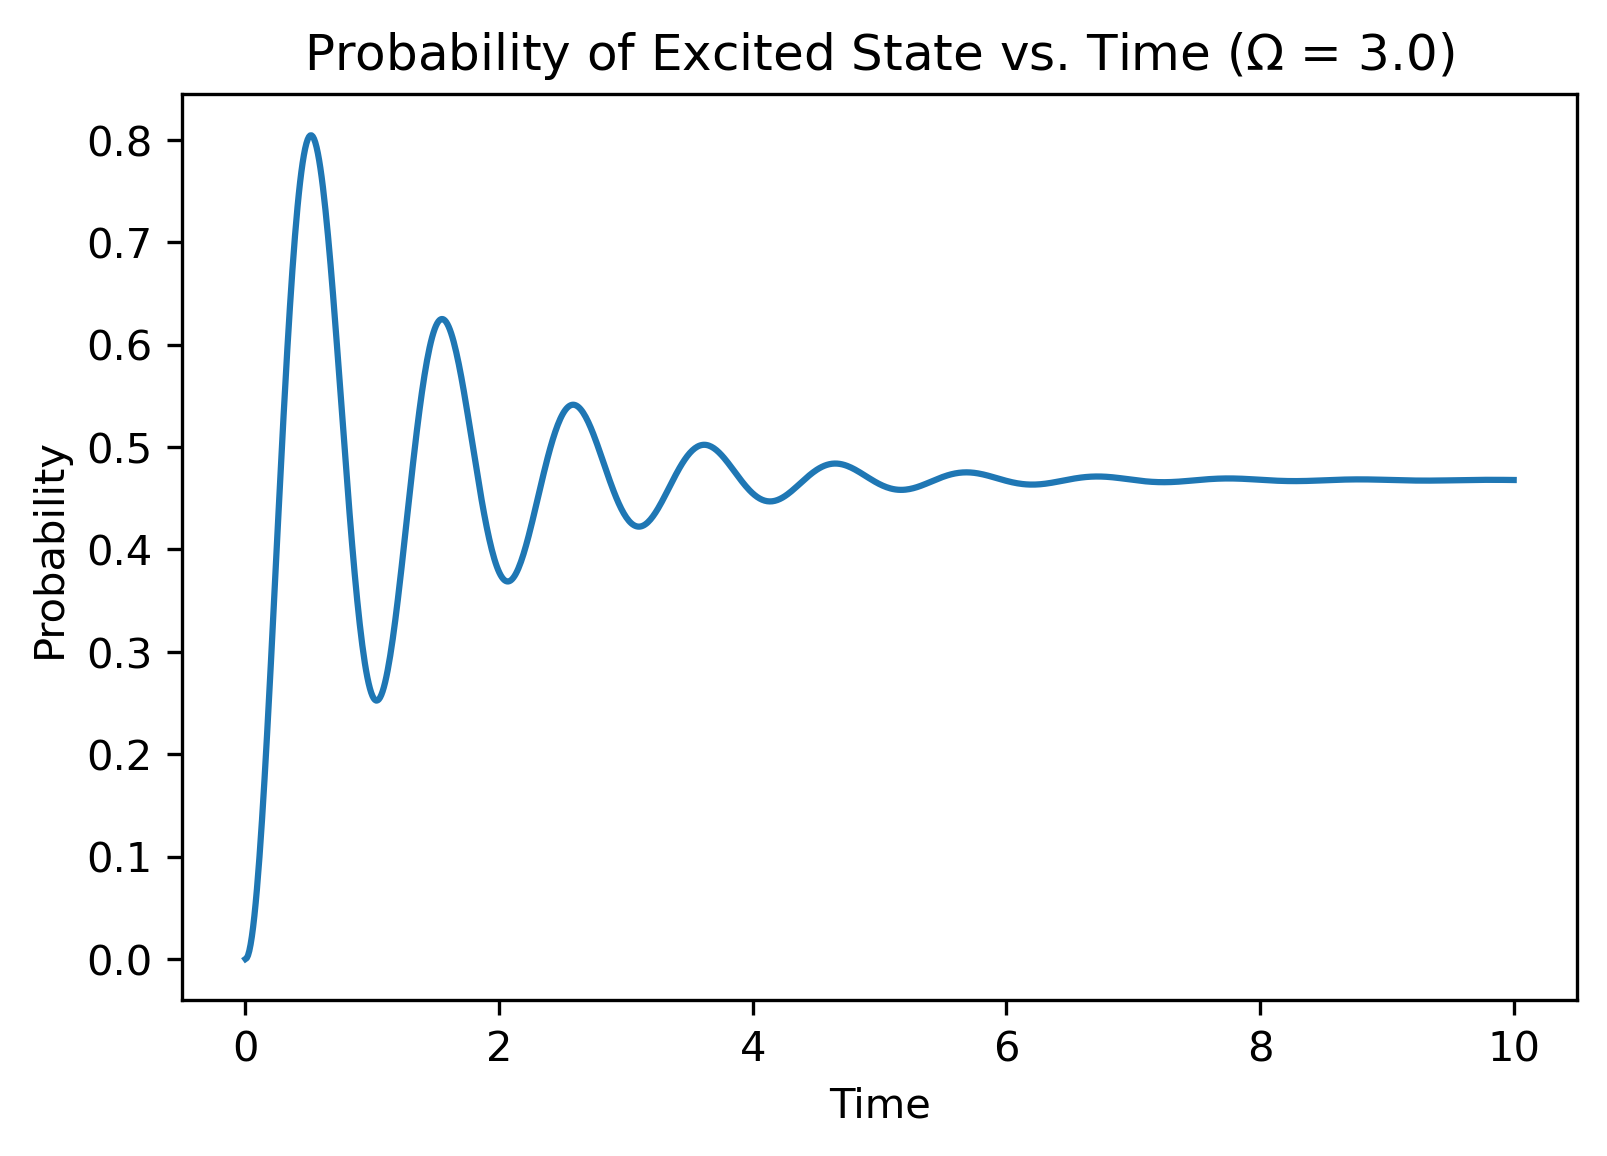

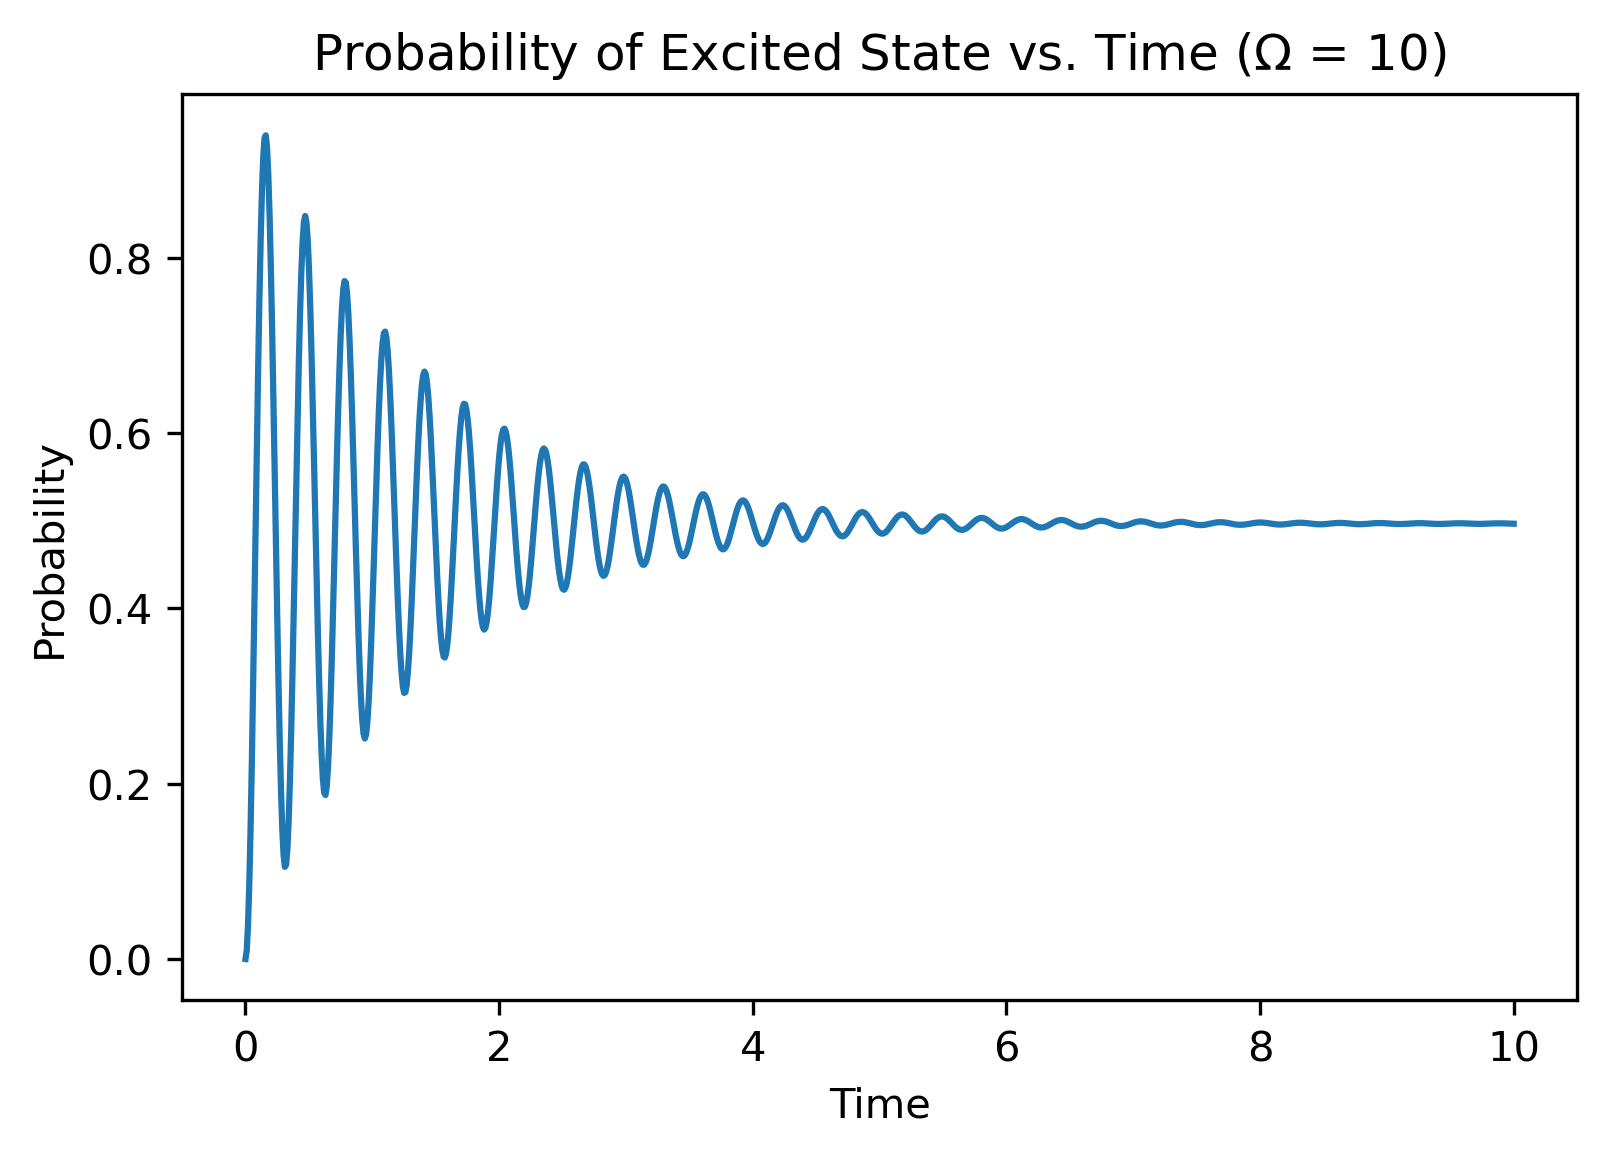

In [3]:
## PART F

#Define the basis states:
e = qt.basis(2,0)
g = qt.basis(2,1)

#Define Omega
Omega = [0.3,1.0,3.0,10]

for i in Omega:

    # Define Constants
    delta = -i
    gamma = i
    w0 = 1
    w = 1
    times = np.linspace(0,10,1000)

    # Set up time-dependent co-efficients
    def H1_coeff(t, args):
        return np.exp(-1j*w*t)

    def H2_coeff(t, args):
        return np.exp(1j*w*t)

    #Construct the Hamiltonian
    
    ## H for two level system
    H0 = qt.Qobj([[2*w0,0],[0,0]])
    
    ## Linbladian portion
    H1 = i*qt.sigmap()
    H2 = i*qt.sigmam()
    
    ##Combine total Hamiltonaina
    H = [H0,[H1, H1_coeff],[H2, H2_coeff]]

    # Define collapse operator, expectation value
    c_ops = qt.sigmam()
    e_ops = [e*e.dag(),g*g.dag()]
    
    # Solve the Master EQ
    answer = qt.mesolve(H,g,times,c_ops, e_ops)
    
    # Plot
    plt.figure(dpi=300)
    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.plot(times,answer.expect[0], label="$\Omega$ = "+str(i))
    plt.title("Probability of Excited State vs. Time ($\Omega$ = "+str(i)+")")
    plt.show()
